## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pour le prétraitement et le split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pour la partie deep learning
import tensorflow as tf

print("Librairies importées.")

Librairies importées.


**QUESTION:** Load dataset and display some lines of the csv file.

In [ ]:
# Adaptez le chemin si nécessaire
df = pd.read_csv('ai4i2020.csv')
print("Dataset AI4I chargé avec succès.")

# Aperçu rapide
print("Aperçu du dataset :")
print(df.head())
print("\nDescription statistique :")
print(df.describe())

Dataset AI4I chargé avec succès.
Aperçu du dataset :
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.


Répartition des classes (failures vs non-failures) :
Machine failure
0    9661
1     339
Name: count, dtype: int64


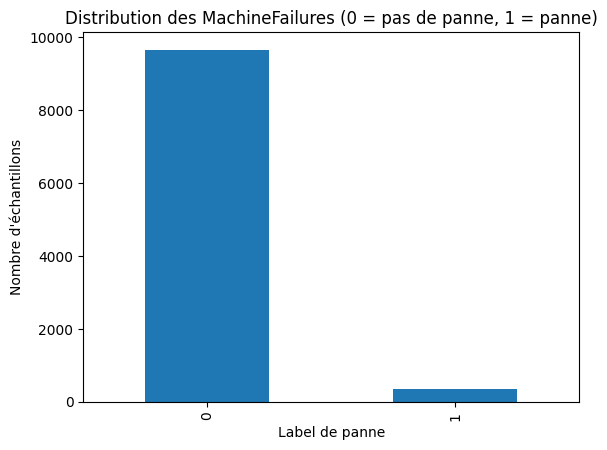

In [ ]:
failure_counts = df['Machine failure'].value_counts()
print("\nRépartition des classes (failures vs non-failures) :")
print(failure_counts)

# Bar chart
plt.figure()
failure_counts.plot(kind='bar')
plt.title("Distribution des MachineFailures (0 = pas de panne, 1 = panne)")
plt.xlabel("Label de panne")
plt.ylabel("Nombre d'échantillons")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

On observe qu'il y a énormément de machines **sans panne** et qu'au contraire, il y très peu de cas labellisés **avec panne**. Cela indique que le jeu de données est fortement déséquilibré en faveur de la classe *« pas de panne »*.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Étant donné que la classe *« pas de panne »* est majoritaire, le modèle risque de **favoriser** la prédiction *« pas de panne »* pour la plupart des échantillons.

On peut s’attendre à ce que le modèle ait une **accuracy** globale trompeusement élevée (car il prédit souvent 0), tout en étant **peu performant** pour détecter les pannes réelles (c’est-à-dire une faiblesse sur la capacité à repérer la classe minoritaire).

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

Information sur les colonnes (noms et types) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000

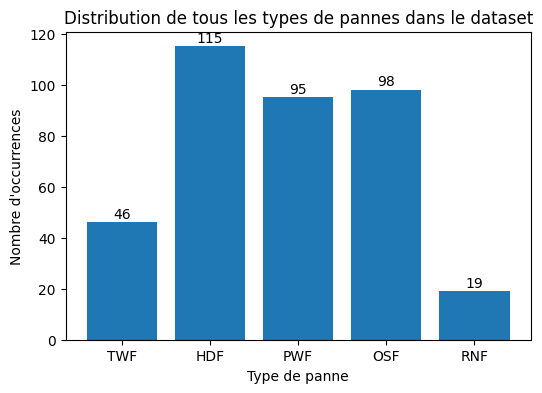

In [ ]:
# =========================================
# BLOC 1 (complément) : Infos sur les colonnes
# =========================================

print("Information sur les colonnes (noms et types) :")
df.info()  # Affiche nom, type et nombre de valeurs non-nulles pour chaque colonne

# =========================================
# Distribution des différents types de pannes
# =========================================

# 1. Afficher la distribution TWF, HDF, PWF, OSF, RNF dans tout le dataset
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# On suppose que dans votre dataset, ces colonnes sont binaires (0 ou 1)
# On fait simplement la somme pour connaître le nombre d'occurrences de chaque type de panne
all_failure_counts = df[failure_cols].sum()

print("\nDistribution des différents types de pannes (TWF, HDF, PWF, OSF, RNF) :")
print(all_failure_counts)

# Bar chart avec valeurs au-dessus des barres
plt.figure(figsize=(6,4))
bars = plt.bar(all_failure_counts.index, all_failure_counts.values)
plt.title("Distribution de tous les types de pannes dans le dataset")
plt.xlabel("Type de panne")
plt.ylabel("Nombre d'occurrences")

# Ajouter le nombre exact au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()


**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."


Distribution des types de pannes parmi les machines en panne uniquement :
TWF                     46
HDF                    115
PWF                     95
OSF                     98
RNF                      1
No Specific Failure      9
dtype: int64


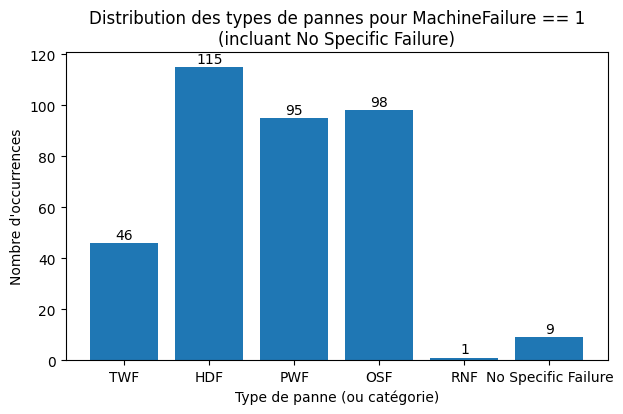

In [ ]:
# =========================================
# Distribution des types de pannes UNIQUEMENT pour les machines en panne
# + Comptage "No Specific Failure"
# =========================================

# Filtrer uniquement les lignes où 'MachineFailure' == 1
df_failure_only = df[df['Machine failure'] == 1]

# Compter les pannes (TWF, HDF, PWF, OSF, RNF) parmi ces machines
failure_counts = df_failure_only[failure_cols].sum()

# Calculer le nombre de machines en panne sans aucun type de panne spécifique
# (c'est-à-dire TWF=HDF=PWF=OSF=RNF=0)
no_specific_failure = (df_failure_only[failure_cols].sum(axis=1) == 0).sum()


# Créer une série pandas combinée avec la catégorie "No Specific Failure"
failure_counts_extended = failure_counts.copy()
failure_counts_extended['No Specific Failure'] = no_specific_failure

print("\nDistribution des types de pannes parmi les machines en panne uniquement :")
print(failure_counts_extended)

# Bar chart
plt.figure(figsize=(7,4))
bars2 = plt.bar(failure_counts_extended.index, failure_counts_extended.values)
plt.title("Distribution des types de pannes pour MachineFailure == 1\n(incluant No Specific Failure)")
plt.xlabel("Type de panne (ou catégorie)")
plt.ylabel("Nombre d'occurrences")

# Ajouter les valeurs sur chaque barre
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()

In [ ]:
df.columns.tolist()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [ ]:
print("Noms des colonnes et leurs types respectifs :")
print(df.dtypes)

Noms des colonnes et leurs types respectifs :
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

"Write your response here"

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
# Définir X et y en fonction de vos colonnes
# Exemple : une colonne 'MachineFailure' = label binaire (0 ou 1)
X = df[[
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']]
y = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
print(y.info())
print(X.dtypes)
"""
X = pd.get_dummies(df[[
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']], columns=["Type"], dtype=np.float32)"""



# Séparation en jeu d'entraînement (train) et jeu de test (test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% pour le test, par exemple
    random_state=42
)
print(y_train)
# Afficher le nombre d'éléments dans chaque ensemble
print(f"Nombre d'éléments dans X_train : {len(X_train)}")
print(f"Nombre d'éléments dans y_train : {len(y_train)}")
print(f"Nombre d'éléments dans X_test  : {len(X_test)}")
print(f"Nombre d'éléments dans y_test  : {len(y_test)}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Machine failure  10000 non-null  int64
 1   TWF              10000 non-null  int64
 2   HDF              10000 non-null  int64
 3   PWF              10000 non-null  int64
 4   OSF              10000 non-null  int64
 5   RNF              10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB
None
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object
      Machine failure  TWF  HDF  PWF  OSF  RNF
9254                0    0    0    0    0    0
1561                0    0    0    0    0    0
1670                0    0    0    0    0    0
6087                0    0    0    0    0    0
6669                0    0    0    0    0    0
...               ...  ..

**QUESTION** Code below the model architecture

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

In [ ]:
# (1) DEFINE THE ARCHITECTURE OF MY MODEL
#first, I define all the layers and the way they are connected
inputs = tf.keras.Input(shape=(X_train.shape[1],))  # Adapter au bon nombre de colonnes
x = tf.keras.layers.Dense(20, activation='tanh')(inputs)  # Pas besoin de Flatten
outputs = tf.keras.layers.Dense(6, activation='sigmoid')(x)  # Multi-label -> sigmoid

my_mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_mlp_model")
my_mlp_model.summary()


# (2) DEFINE THE TRAINING HYPER-PARAMETERS WITH THE "COMPILE" METHOD:
'''
(1) Set the "optimizer" [pick 'adam', 'sgd' or 'rmsprop']
(2) Set the loss [cf. lesson #3, we pick the categorical cross-entropy]
(3) Set the final performance metric to evaluate the model
'''

my_mlp_model.compile(optimizer='adam',
                     loss='binary_crossentropy',  # Car multi-label
                     metrics=['binary_accuracy'])  # Ou 'accuracy' si tu veux rester dessus




# (3) NOW, LET'S TRAIN ON MY DATA WITH THE "FIT" METHOD
'''
(1) Set the number of epochs
(2) Set the size of the (mini)batch
(3) Set the training dataset ==> here, X_train with Y_train
(4) Set the validation dataset (X_val, Y_val)
'''
nb_epochs=10
batch_size=100
training_history = my_mlp_model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=nb_epochs,batch_size=batch_size)

#COMPUTE THE ACCURACY ON THE TRAINING AND TEST SETS
loss_train, acc_train = my_mlp_model.evaluate(X_train, y_train, batch_size=batch_size)
loss_test, acc_test = my_mlp_model.evaluate(X_test, y_test, batch_size=batch_size)

print("Performance on the TRAIN set, ACCURACY=",acc_train)
print("Performance on the TEST set, ACCURACY=",acc_test)

Model: "my_mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_8 (Dense)             (None, 20)                120       
                                                                 
 dense_9 (Dense)             (None, 6)                 126       
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
80/80 [==============================] - 1s 5ms/step - loss: 0.4649 - binary_accuracy: 0.7943 - val_loss: 0.2684 - val_binary_accuracy: 0.8242
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.1933 - binary_accuracy: 0.9857 - val_loss: 0.1387 - val_binary_accuracy: 0.9889
Epoch 3/10
8

In [ ]:
print(training_history.history)

{'loss': [0.4648975431919098, 0.19334296882152557, 0.11802592128515244, 0.09128481149673462, 0.0791817232966423, 0.07284978777170181, 0.06845360994338989, 0.06583234667778015, 0.06419042497873306, 0.06315689533948898], 'binary_accuracy': [0.7943333387374878, 0.9857499003410339, 0.9879376292228699, 0.9879373908042908, 0.9879376292228699, 0.9879375100135803, 0.9879376292228699, 0.9879375100135803, 0.9879375696182251, 0.9879375696182251], 'val_loss': [0.26839447021484375, 0.13866978883743286, 0.09758474677801132, 0.08050833642482758, 0.07201723009347916, 0.06716351211071014, 0.06340140849351883, 0.06157649680972099, 0.06038480997085571, 0.059761855751276016], 'val_binary_accuracy': [0.8242499828338623, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724, 0.98891681432724]}


In [ ]:
def display_training_curves(training_history):
  # display loss
  plt.plot(training_history.history['loss'],label='loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()
  #display accuracy
  plt.plot(training_history.history['binary_accuracy'],label='acc')
  plt.plot(training_history.history['val_binary_accuracy'], label='val_acc')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()

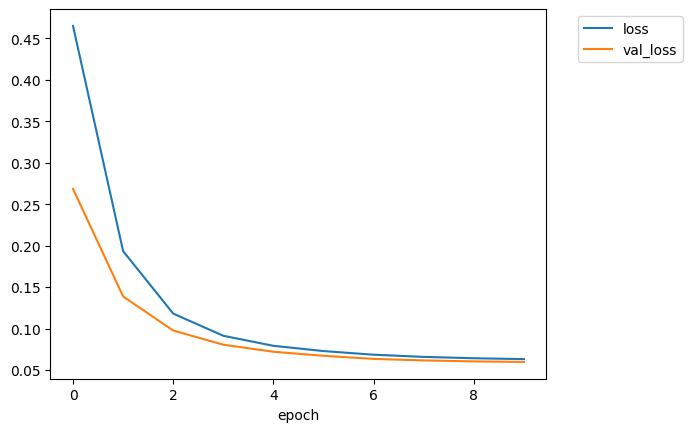

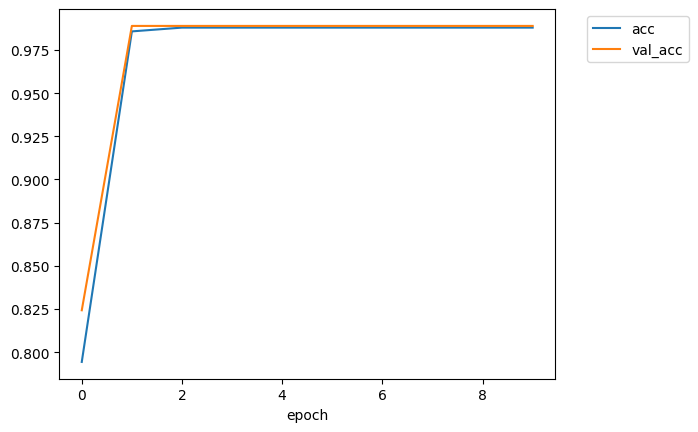

In [ ]:
display_training_curves(training_history )

il est normal que on est val_acc presque à 1 car on va voir dans le report avec le recall de la classe mojoritaire, celle où ya pas d'erreur, que on est toujours à un et presque à 0 pour toutes les autres classes. En conclusion juste observer la loss et l'accuracy n'est suffisant.

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 [==============================] - 0s 1ms/step
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Classification Report:
                 precision    recall  f1-score   support

Machine failure       0.00      0.00      0.00        61
            TWF       0.00      0.00      0.00        11
            HDF       0.00      0.00      0.00        17
            PWF       0.00      0.00      0.00        20
            OSF       0.00      0.00      0.00        18
            RNF       0.00      0.00      0.00         6

      micro avg       0.00      0.00      0.00       133
      macro avg       0.00      0.00      0.00       133
   weighted avg       0.00      0.00      0.00       133
    samples avg       0.00      0.00      0.00       133



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

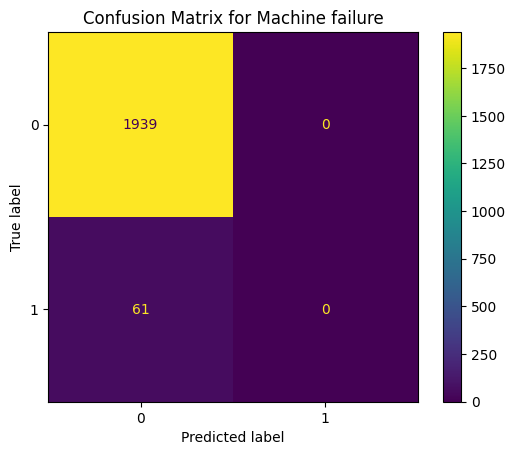

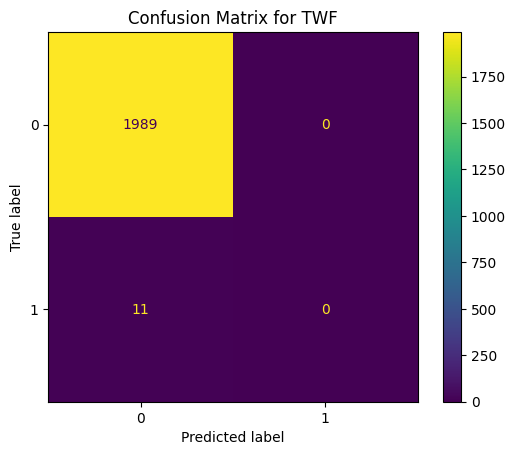

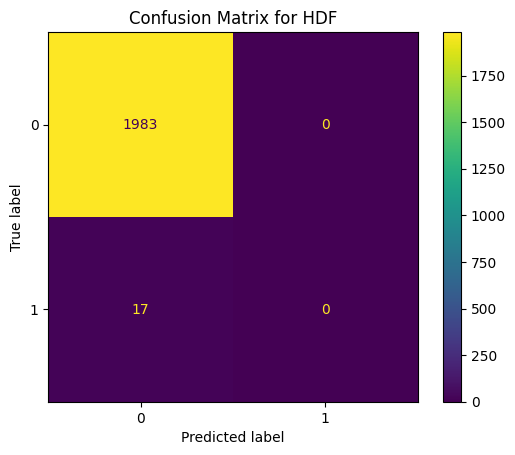

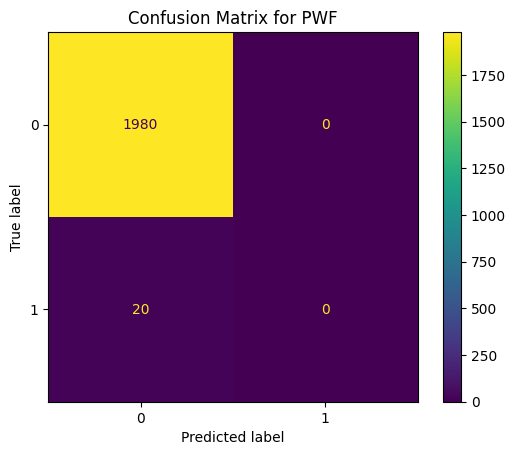

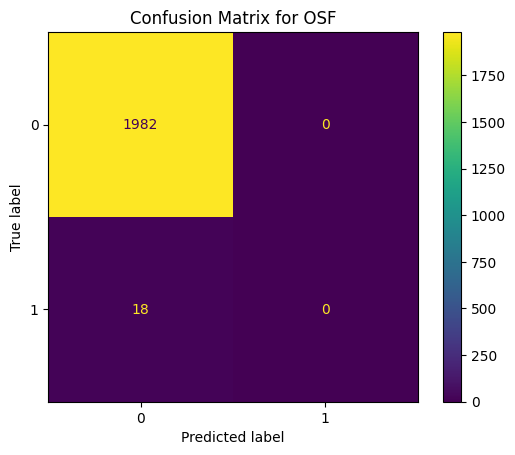

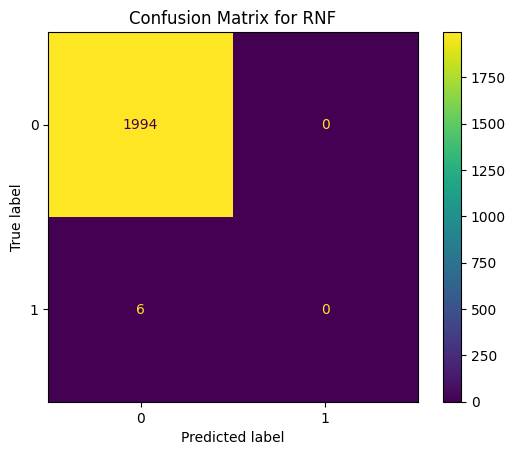

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prédictions du modèle
y_pred = my_mlp_model.predict(X_test).astype(int)
#y_pred = (y_pred_proba >= 0.5).astype(int)

# Vérification des formats
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.values
print(y_test)
print(y_pred)
# Noms des classes
class_names = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Matrices de confusion pour chaque label
for idx, label in enumerate(class_names):
    cm = confusion_matrix(y_test[:, idx], y_pred[:, idx])  # Ici plus d'erreur
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {label}")
    plt.show()


**ANALYSIS QUESTION** What do you observe? What can you conclude?

Aucune panne n'est jamais prédite car il n'y a pas assez de de données avec des erreurs machines donc il estime qu'il n'y a jamais de panne, il faut donc faire de l'undersampling pour supprimer des données sans pannes qui se ressemblent et de l'oversampling pour ajouter des données avec erreur de manière artificielle.

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# ----------------------------------------------------------------
# ÉTAPE 1 : Transformation des labels et définition des features
# ----------------------------------------------------------------

df.rename(columns={'Machine failure': 'Machine working'}, inplace=True)
df['Machine working'] = 1 - df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].max(axis=1)

df['failure_count'] = df[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)

B = df[df['failure_count'] > 1]  # Données multi-labels (non utilisées ici)
A = df[df['failure_count'] <= 1]  # Données utilisables en classification multi-classe

# Définition des features (X) et labels (y)
X = A[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

# 📌 Transformation en classification multi-classe
y = A[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].idxmax(axis=1)  # Prend la 1ère classe non-nulle

# ----------------------------------------------------------------
# Encodage One-Hot des labels
# ----------------------------------------------------------------
# Initialisation du OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)  # sparse=False pour avoir un tableau numpy
y_onehot = onehot_encoder.fit_transform(y.values.reshape(-1, 1))  # On transforme y en matrice (n_samples, 1)

# Conversion en np.array
X_np = np.array(X)
y_np = np.array(y_onehot)  # Utilisation des labels encodés en one-hot

# ----------------------------------------------------------------
# ÉTAPE 2 : Équilibrage du dataset avec SMOTE (Avant le split)
# ----------------------------------------------------------------

print(f"\n📌 y shape avant SMOTE : {y_np.shape}")

try:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_np, y_np)  # SMOTE sur tout le dataset
    print("\n✅ SMOTE appliqué avec succès !")
except Exception as e:
    print("\n❌ Erreur avec SMOTE :", e)

# 📌 Vérification après SMOTE
print("\n📌 Répartition des labels après SMOTE :")
unique, counts = np.unique(np.argmax(y_res, axis=1), return_counts=True)
print(f"Répartition des labels après SMOTE : {dict(zip(range(y_res.shape[1]), counts))}")  # Utilisation des indices des classes

# ----------------------------------------------------------------
# ÉTAPE 3 : Séparation en jeu d'entraînement et test (Après SMOTE)
# ----------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=np.argmax(y_res, axis=1)  # Stratification sur les classes
)

# ----------------------------------------------------------------
# ÉTAPE 4 : Finalisation des données
# ----------------------------------------------------------------

# Conversion en np.array final
X_train_final = np.array(X_train)
y_train_final = np.array(y_train)
X_test_final = np.array(X_test)
y_test_final = np.array(y_test)

# 📌 Vérification du test set
print("\n📌 Répartition des labels sur le test set :")
unique, counts = np.unique(np.argmax(y_test_final, axis=1), return_counts=True)
print(f"Répartition des labels sur le test set : {dict(zip(range(y_test_final.shape[1]), counts))}")



📌 y shape avant SMOTE : (9976, 6)

✅ SMOTE appliqué avec succès !

📌 Répartition des labels après SMOTE :
Répartition des labels après SMOTE : {0: 9652, 1: 9652, 2: 9652, 3: 9652, 4: 9652, 5: 9652}

📌 Répartition des labels sur le test set :
Répartition des labels sur le test set : {0: 1930, 1: 1930, 2: 1931, 3: 1931, 4: 1931, 5: 1930}


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

In [ ]:
!pip install tensorflow===2.12.0


📌 y shape avant SMOTE : (7984, 5)
Répartition des classes avant SMOTE : Counter({0: 7729, 2: 91, 3: 66, 4: 65, 1: 33})
Répartition des classes après sous-échantillonnage : Counter({0: 6600, 2: 91, 3: 66, 4: 65, 1: 33})

✅ SMOTE appliqué avec succès !

📌 Répartition des labels après SMOTE :
{0: 6600, 1: 1650, 2: 1820, 3: 1320, 4: 1300}

📌 Formes après reconversion en DataFrames :
X_train_final_df shape : (12706, 5)
y_train_final_df shape : (12706, 5)
X_test_final_df shape  : (2000, 5)
y_test_final_df shape  : (2000, 5)

📌 Types de données après reconversion :
X_train_final_df types : Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
dtype: object
y_train_final_df types : Machine working    float64
TWF                float64
HDF                float64
PWF                float64
OSF                float64
dtype: object
X_test_final_df types  : Air temperature [K]  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


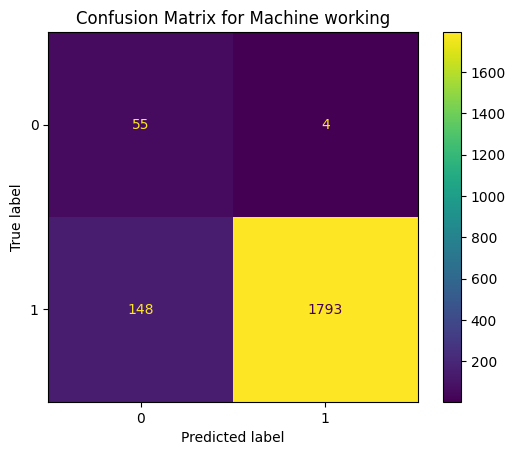

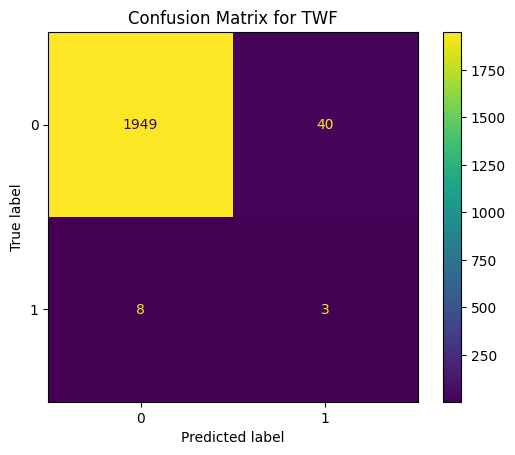

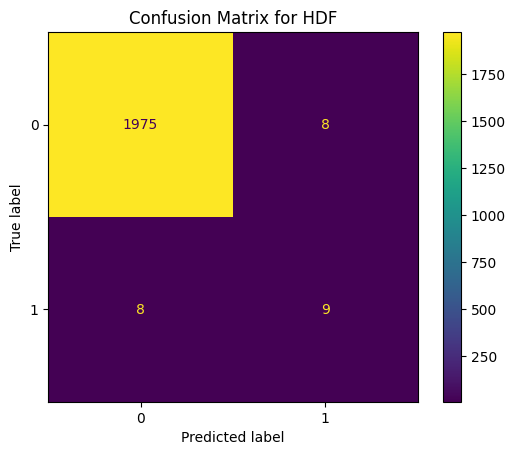

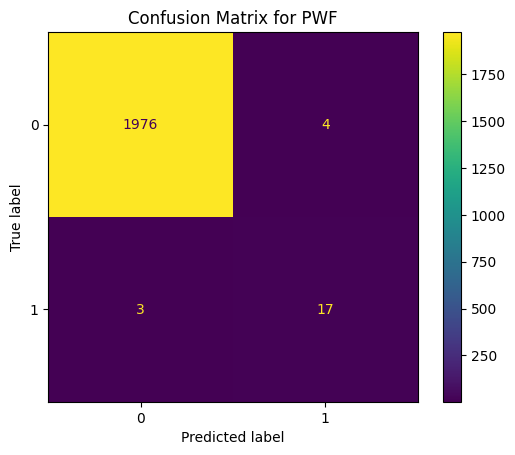

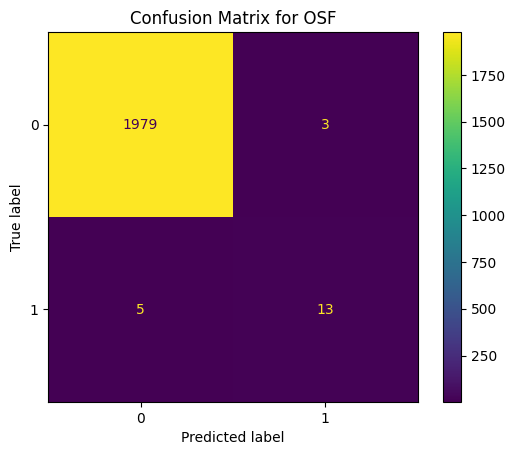

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import LearningRateScheduler

# ----------------------------------------------------------------
# ÉTAPE 1 : Chargement et préparation des données
# ----------------------------------------------------------------

# Charger les données (remplacez par votre chargement de données)
df = pd.read_csv('ai4i2020.csv')

# Renommer la colonne 'Machine failure' en 'Machine working'
df.rename(columns={'Machine failure': 'Machine working'}, inplace=True)

# Créer la colonne 'Machine working' (inverse des autres pannes)
df['Machine working'] = (df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1) == 0).astype(int)

# Créer la colonne 'failure_count' pour compter les pannes
df['failure_count'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)

# ----------------------------------------------------------------
# ÉTAPE 2 : Split du dataset avant la séparation en A et B
# ----------------------------------------------------------------

# Diviser le dataset en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Séparer les ensembles d'entraînement et de test en A et B
A_train = train_df[train_df['failure_count'] <= 1]  # Données utilisables en classification single-label
B_train = train_df[train_df['failure_count'] > 1]   # Données avec plus d'une panne (multi-label)

# ----------------------------------------------------------------
# ÉTAPE 3 : Préparation des features et labels pour A_train et A_test
# ----------------------------------------------------------------

# Définir les features (X) et les labels (y) pour A_train et A_test
X_train = A_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train = A_train[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label

X_test = test_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_test = test_df[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label

# ----------------------------------------------------------------
# ÉTAPE 4 : Équilibrage du dataset avec SMOTE
# ----------------------------------------------------------------

print(f"\n📌 y shape avant SMOTE : {y_train.shape}")
y_train_labels = np.argmax(y_train, axis=1)  # Pour SMOTE, on utilise la classe majoritaire
class_counts = Counter(y_train_labels)

# Vérifier la répartition des classes avant SMOTE
print("Répartition des classes avant SMOTE :", Counter(np.argmax(y_train, axis=1)))

# Si une seule classe est présente, ajuster le sous-échantillonnage
if len(np.unique(np.argmax(y_train, axis=1))) == 1:
    raise ValueError("Une seule classe est présente dans les labels. Ajustez le sous-échantillonnage ou la séparation des données.")

# Définir une stratégie de sous-échantillonnage pour équilibrer les classes
minority_class = min(class_counts, key=class_counts.get)
target_count = class_counts[minority_class]  # Nombre d'échantillons de la classe minoritaire

# Trouver la classe majoritaire
majority_class = max(class_counts, key=class_counts.get)

# Définir un multiplicateur pour la classe majoritaire (par exemple, 2x ou 3x la taille de la classe minoritaire)
majority_multiplier = 200  # Vous pouvez ajuster ce multiplicateur
majority_target_count = min(target_count * majority_multiplier, class_counts[majority_class])

# Définir la stratégie de sous-échantillonnage
sampling_strategy = {cls: (majority_target_count if cls == majority_class else count)
                     for cls, count in class_counts.items()}

# Sous-échantillonnage de toutes les classes
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = under_sampler.fit_resample(X_train, np.argmax(y_train, axis=1))

# Vérifier la répartition des classes après sous-échantillonnage
print("Répartition des classes après sous-échantillonnage :", Counter(y_train_res))

# Identifier la classe la plus minoritaire
most_minority_class = min(class_counts, key=class_counts.get)

# Définir une stratégie de suréchantillonnage pour SMOTE
# Augmenter considérablement la classe la plus minoritaire
smote_strategy = {
    cls: min(int(count * 50), class_counts[majority_class]) if cls == most_minority_class  # Multiplicateur élevé pour la classe la plus minoritaire
    else min(int(count * 20), class_counts[majority_class])  # Multiplicateur plus faible pour les autres classes minoritaires
    for cls, count in class_counts.items() if cls != majority_class
}

# Application de SMOTE avec la stratégie personnalisée
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_res, y_res_indices = smote.fit_resample(X_train_res, y_train_res)

# Convertir y_res en encodage binaire après SMOTE
y_res_multi = to_categorical(y_res_indices, num_classes=5)

print("\n✅ SMOTE appliqué avec succès !")
print("\n📌 Répartition des labels après SMOTE :")
unique, counts = np.unique(np.argmax(y_res_multi, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

# ----------------------------------------------------------------
# ÉTAPE 5 : Concaténation de B_train après SMOTE
# ----------------------------------------------------------------

X_B_train = B_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_B_train = B_train[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label

# Concaténation des données
X_train_final = np.concatenate([X_res, X_B_train], axis=0)
y_train_final = np.concatenate([y_res_multi, y_B_train], axis=0)

X_test_final = X_test
y_test_final = y_test

# ----------------------------------------------------------------
# ÉTAPE 6 : Reconversion en DataFrames après concaténation
# ----------------------------------------------------------------

# Convertir X_train_final et X_test_final en DataFrames
X_train_final_df = pd.DataFrame(X_train_final, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
X_test_final_df = pd.DataFrame(X_test_final, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

# Convertir y_train_final et y_test_final en DataFrames
y_train_final_df = pd.DataFrame(y_train_final, columns=['Machine working', 'TWF', 'HDF', 'PWF', 'OSF'])
y_test_final_df = pd.DataFrame(y_test_final, columns=['Machine working', 'TWF', 'HDF', 'PWF', 'OSF'])

# Vérification des formes et des types
print("\n📌 Formes après reconversion en DataFrames :")
print(f"X_train_final_df shape : {X_train_final_df.shape}")
print(f"y_train_final_df shape : {y_train_final_df.shape}")
print(f"X_test_final_df shape  : {X_test_final_df.shape}")
print(f"y_test_final_df shape  : {y_test_final_df.shape}")

print("\n📌 Types de données après reconversion :")
print(f"X_train_final_df types : {X_train_final_df.dtypes}")
print(f"y_train_final_df types : {y_train_final_df.dtypes}")
print(f"X_test_final_df types  : {X_test_final_df.dtypes}")
print(f"y_test_final_df types  : {y_test_final_df.dtypes}")

# ----------------------------------------------------------------
# ÉTAPE 7 : Normalisation des données
# ----------------------------------------------------------------

# Normalisation des données
scaler = StandardScaler()

# Appliquer la normalisation sur les données d'entraînement
X_train_final_df = scaler.fit_transform(X_train_final_df)

# Appliquer la même normalisation sur les données de test
X_test_final_df = scaler.transform(X_test_final_df)

# Ajout de bruit gaussien aux features
noise_factor = 0.02
X_train_final_noisy = X_train_final_df + noise_factor * np.random.normal(size=X_train_final_df.shape)

# ----------------------------------------------------------------
# ÉTAPE 8 : Définition du modèle et du learning rate scheduler
# ----------------------------------------------------------------

# Définition de l'architecture du modèle MLP
inputs = tf.keras.Input(shape=(X_train_final.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(32, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(5, activation='sigmoid')(x)

my_mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_mlp_model")
my_mlp_model.summary()

# Définition de la fonction de learning rate scheduler
def custom_learning_rate_scheduler(epoch, initial_lr=0.08, decay_rate=0.1):
    """
    Fonction personnalisée pour diminuer le learning rate en fonction de l'epoch.
    """
    return initial_lr * (1 / (1 + decay_rate * epoch))

# Créer un callback pour le scheduler personnalisé
lr_scheduler_custom = LearningRateScheduler(custom_learning_rate_scheduler)

# Définition de l'optimiseur avec un learning rate initial
optimizer = tf.keras.optimizers.Adam(learning_rate=0.08)

# Compilation du modèle
my_mlp_model.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['binary_accuracy'])

# Early stopping ajusté
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Entraînement du modèle avec le scheduler personnalisé
nb_epochs = 50
batch_size = 256
training_history = my_mlp_model.fit(
    X_train_final_noisy, y_train_final_df,  # Utilisation des données avec bruit
    validation_data=(X_test_final_df, y_test_final_df),
    epochs=nb_epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, lr_scheduler_custom]  # Ajouter le scheduler personnalisé
)

# Évaluation du modèle
loss_train, acc_train = my_mlp_model.evaluate(X_train_final_df, y_train_final_df, batch_size=batch_size)
loss_test, acc_test = my_mlp_model.evaluate(X_test_final_df, y_test_final_df, batch_size=batch_size)

print("Performance sur le TRAIN set, ACCURACY =", acc_train)
print("Performance sur le TEST set, ACCURACY =", acc_test)

# ----------------------------------------------------------------
# ÉTAPE 9 : Évaluation du modèle
# ----------------------------------------------------------------

# Prédictions du modèle (obtenues en probabilités)
y_pred_proba = my_mlp_model.predict(X_test_final_df)

# Convertir les probabilités en classes binaires (0 ou 1) avec un seuil de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Convertir y_test_final_df en numpy array si c'est un DataFrame
if isinstance(y_test_final_df, pd.DataFrame):
    y_test_final_df = y_test_final_df.to_numpy()

# Vérifier que y_pred est bien un numpy array
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.to_numpy()

# Vérifier les dimensions et les valeurs après correction
print(f"Shape de y_test_final_df : {y_test_final_df.shape}")
print(f"Shape de y_pred : {y_pred.shape}")
print(f"Valeurs uniques de y_test_final_df après correction : {np.unique(y_test_final_df)}")
print(f"Valeurs uniques de y_pred : {np.unique(y_pred)}")

class_names = ['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']
# Rapport de classification
print("Classification Report:")
print(classification_report(y_test_final_df, y_pred, target_names=class_names))

# Matrices de confusion pour chaque label
for idx, label in enumerate(class_names):
    cm = confusion_matrix(y_test_final_df[:, idx], y_pred[:, idx])  # Ici plus d'erreur
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {label}")
    plt.show()

In [ ]:
# Télécharger les modèles

# Convertir le modèle en format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(my_mlp_model)
tflite_model = converter.convert()

# Sauvegarder le modèle TFLite dans un fichier
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Conversion des arrays en float32 avant sauvegarde
X_test_scaled_float32 = X_test_final_df.astype(np.float32)
Y_test_float32 = y_test_final_df.astype(np.float32)

# Sauvegarde des arrays convertis
np.save("X_test_ai4i.npy", X_test_scaled_float32)
np.save("Y_test_ai4i.npy", Y_test_float32)

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"